In [223]:
import numpy 
import math 
from scipy import integrate
from matplotlib import pyplot
%matplotlib inline

# 1. To Solve for the flow NACA 2510 airfoil at an angle 2, Plot the pressure coefficient as a function of x coordinate.

In [232]:
class Panel:

    def __init__(self, xa, ya, xb, yb):

        # End Points
        self.xa, self.ya = xa, ya
        self.xb, self.yb = xb, yb
        
        # Center Point
        self.xc, self.yc = (xa+xb)/2, (ya+yb)/2       
        
        # Length
        self.length = math.sqrt((xb-xa)**2+(yb-ya)**2)
        
        # Orientation
        if xb-xa <= 0.:
            self.beta = math.acos((yb-ya)/self.length)
        elif xb-xa > 0.:
            self.beta = math.pi + math.acos(-(yb-ya)/self.length)
                
        # Strength  
        self.kappa = 1.0                           

        
        # Normal and Tangental Coponents
        self.n= [math.cos(self.beta), math.sin(self.beta)]
        self.t= [-math.sin(self.beta), math.cos(self.beta)] 
        
        # Pressure Coeffecient          
        self.cp = 0.
        
        # Tangent Velocity      
        self.vt = 0.   

In [233]:
def get_doublet_panel_velocity(p,x,y):
  
    x_p =  math.sin(p.beta)*(x-p.xb) - math.cos(p.beta)*(y-p.yb)
    y_p =  math.cos(p.beta)*(x-p.xb) + math.sin(p.beta)*(y-p.yb)
    
    u_p = -(p.kappa/(2*math.pi))*((x_p/(x_p**2+y_p**2))-(y_p/((x_p-p.length)**2+y_p**2)))
    v_p = (p.kappa/(2*math.pi))*((x_p/(x_p**2+y_p**2))-((x_p-panel.length)/((x_p-p.length)**2+y_p**2)))
    
    u =  math.sin(p.beta)*u_p + math.cos(p.beta)*v_p
    v = -math.cos(p.beta)*u_p + math.sin(p.beta)*v_p
    
    return u, v

In [234]:
# Airfoil Geometry

t = 0.10                       # Thickness Ratio
alpha = 2*math.pi/180         # Angle of Attack
c = 1                         # Chord Length
a = c/4
h=0.02

# Number of Panels
N_panels = 38  
theta = numpy.linspace(0, 2*math.pi, N_panels+1)                               

# Joukowski Tansformation                       

r_a = (1/4)+(t/(3*math.sqrt(3)))
Zeta = (r_a)*numpy.exp(1j*(theta))
Zeta_c = -4*a/(3*math.sqrt(3))*t + 1j*2*a*h

J = (Zeta+Zeta_c) + a**2/(Zeta+Zeta_c)

x_ends = J.real
y_ends = J.imag

# Recreating Panels
panels = numpy.empty(N_panels, dtype=object)
for i in range(N_panels):
    panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i+1], y_ends[i+1])
    
panels[0] = panels[1]
panels[36] = panels[37]

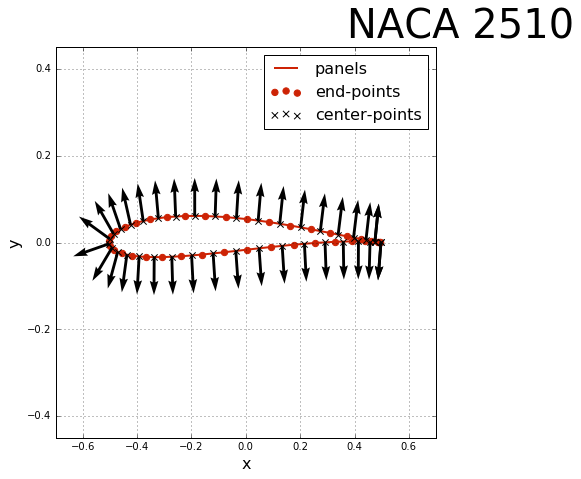

In [235]:
pyplot.figure(figsize=(15,7))
pyplot.subplot(121)
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.suptitle('NACA 2510', fontsize=40)
pyplot.plot(x_ends, y_ends, color='#CD2305', linestyle='-', linewidth=2)
pyplot.scatter([p.xa for p in panels], [p.ya for p in panels], color='#CD2305', s=40)
pyplot.scatter([p.xc for p in panels], [p.yc for p in panels], color='k', marker='x', s=40, zorder=3)
pyplot.quiver([p.xc for p in panels], [p.yc for p in panels], [p.t[1] for p in panels] ,[p.n[1] for p in panels],scale = 10,  color='k',zorder=3)
pyplot.legend(['panels', 'end-points', 'center-points'], loc='best', prop={'size':16})
pyplot.xlim(-.7, .7)
pyplot.ylim(-.45, .45);

In [228]:
# Normal Velocity Linear Equation

u_inf = 1
A = numpy.empty((N_panels, N_panels), dtype=float)
    
for i in range(N_panels):
    for j in range(N_panels):
        if i != j:
            A[i,j] = numpy.dot(get_doublet_panel_velocity(panels[j],panels[i].xc,panels[i].yc),panels[i].n)*1.001
        else:
            A[i,j] = 2/(math.pi*panel.length)
            
b = numpy.empty((N_panels), dtype='float')
for i in range(N_panels):
    b[i] = -numpy.dot(numpy.array([u_inf,0]), (panels[i].n))

In [229]:
# Solves Normal Velocty
kappa = numpy.linalg.solve(A,b)

In [230]:
# Tangent Velocity Linear Equation
C = numpy.empty((N_panels, N_panels), dtype=float)

for i in range(N_panels):
    for j in range(N_panels):
        if i != j:
            C[i,j] = numpy.dot(get_doublet_panel_velocity(panels[j],panels[i].xc,panels[i].yc),panels[i].t)
        else:
            C[i,j] = 0.0
            
d = numpy.empty((N_panels), dtype='float')
for i in range(N_panels):
    d[i] = numpy.dot(numpy.array([u_inf,0]), (panels[i].t))

In [243]:
# Calculates Tangental Velocity
vt = numpy.empty(len(panels), dtype=float)
vt = numpy.dot(C, kappa) + d

for i, panel in enumerate(panels):
    panel.vt = -1/2*((panel.k[i+1]-panel.k[i-1])/(2*math.sqrt((panels[i+1].xc-panels[i-1].xc)**2+(panels[i+1].yc-panels[i-1].yc)**2))

# Pressure Coeffecient
#for panel in panels:
  #  panel.cp = 1.0 - (panel.vt/u_inf)**2



SyntaxError: unexpected EOF while parsing (<ipython-input-243-8daa7ccb6627>, line 10)

In [ ]:
pyplot.figure(figsize=(15,7))
pyplot.subplot(122)
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('$C_p$', fontsize=16)
pyplot.xlim(-.6, .6)
pyplot.ylim(1.5, -1);
pyplot.scatter([p.xc for p in panels], [p.cp for p in panels], color='r', s=60, zorder=2)
pyplot.title('Number of panels: %d' % N_panels)
pyplot.legend(['source panel method'], loc='best', prop={'size':16});